###  Cargamos las librerias necesarias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url, error_bad_lines=False)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna
data

,Item,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15
0,Casos nuevos con sintomas,1.0,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,...,4888.0,5760.0,4237.0,3587.0,5226.0,5089.0,6217.0,5969.0,6368.0,4660.0
1,Casos totales,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,127745.0,134150.0,138846.0,142759.0,148496.0,154092.0,160846.0,167355.0,174293.0,179436.0
2,Casos recuperados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fallecidos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1541.0,2190.0,2264.0,2283.0,2475.0,2648.0,2870.0,3101.0,3323.0,3362.0
4,Casos activos,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,22387.0,24363.0,24334.0,23115.0,24201.0,25000.0,26618.0,26958.0,27266.0,27282.0
5,Casos nuevos sin sintomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,358.0,645.0,459.0,326.0,511.0,507.0,537.0,540.0,570.0,483.0
6,Casos nuevos totales,1.0,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,...,5246.0,6405.0,4696.0,3913.0,5737.0,5596.0,6754.0,6509.0,6938.0,5143.0
7,Casos activos por FD,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,62352.0,65048.0,64849.0,64798.0,66207.0,67149.0,70208.0,72497.0,74605.0,74277.0
8,Casos activos por FIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22387.0,24363.0,24334.0,23115.0,24201.0,25000.0,26618.0,26958.0,27266.0,27282.0
9,Casos recuperados por FIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103817.0,107597.0,112248.0,117361.0,121820.0,126444.0,131358.0,137296.0,143704.0,148792.0


In [3]:
fallecidos  = data[data["Item"]=="Fallecidos"].values.tolist()[0][1:]
contagiados = data[data["Item"]=="Casos totales"].values.tolist()[0][1:]
df_letalidad = pd.DataFrame({
    'fecha': data.columns[1:],
    'contagiados': contagiados,
    'fallecidos': fallecidos
})
df_letalidad["letalidad"] = (df_letalidad["fallecidos"] / df_letalidad["contagiados"]) * 100

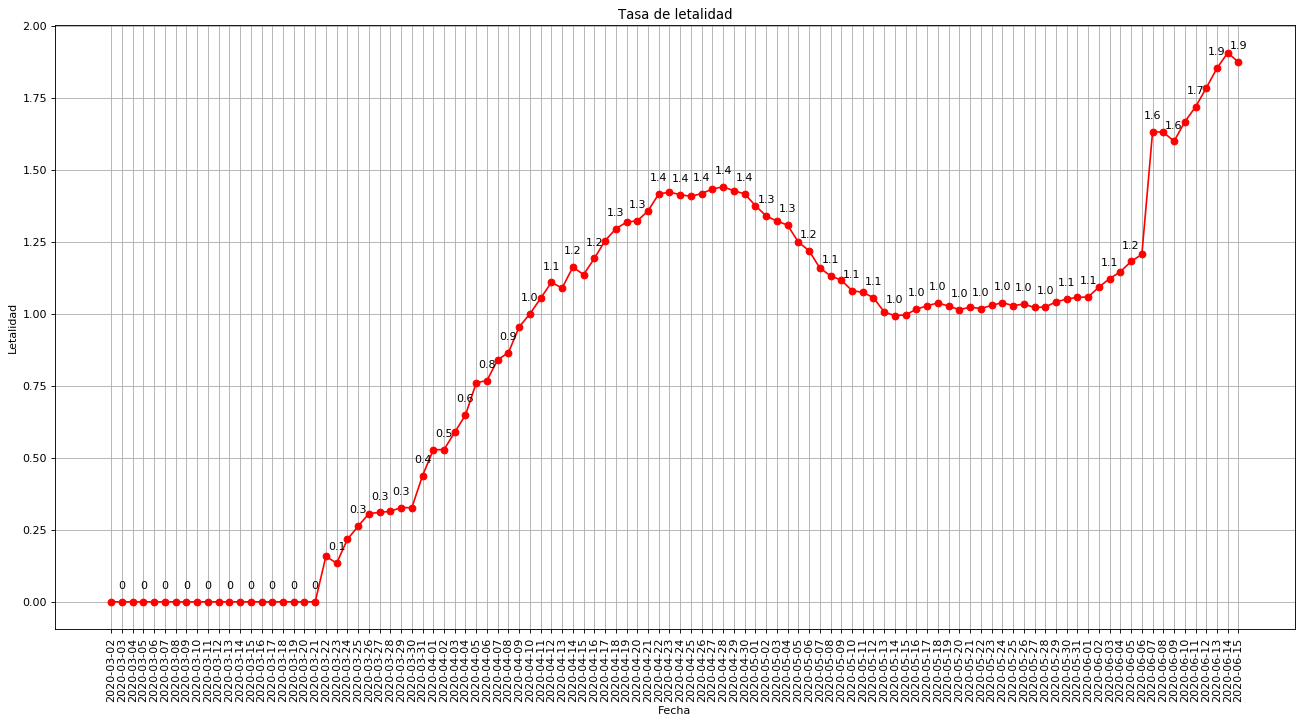

In [4]:
def labelonbars(X, Y):
    n       = len(X)
    aux = 0
    for i in range (n):
        if float(Y[i]) == 0.0 :
            number = "0"
        else:
            number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
            
        if aux == 1:    
            plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, 10),
                textcoords="offset points",
                ha ='center', va='bottom',
                size='10')
            aux = 0
        else: 
            aux = 1
        
        

Y            = df_letalidad["letalidad"].values.tolist()
X            = data.columns[1:]
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, Y, 'ro-')
labelonbars(X, Y)
plt.xlabel('Fecha')
plt.ylabel('Letalidad')
plt.title('Tasa de letalidad')
plt.grid()
plt.xticks(X, rotation='vertical')
plt.show()

# Tasa de letalidad por regiones

In [5]:
url_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
data_region = pd.read_csv(url_region)
data_region

,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
0,2020-03-03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2020-03-04,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3
2,2020-03-05,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4
3,2020-03-06,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,5
4,2020-03-07,0,0,0,0,0,0,4,0,2,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2020-06-11,967,3696,3753,389,1345,5865,124135,1552,2560,1673,2974,2535,462,1062,22,1102,154092
101,2020-06-12,1011,3823,3885,413,1438,6171,129694,1629,2691,1718,3103,2579,479,1083,22,1107,160846
102,2020-06-13,1062,4004,4038,436,1512,6527,134751,1788,2844,1737,3269,2645,487,1108,24,1123,167355
103,2020-06-14,1109,4145,4286,448,1556,6758,140398,1927,2997,1778,3401,2675,497,1141,24,1153,174293


In [6]:
date = str(datetime.date.today())
date

'2020-06-15'

In [7]:
contagiados_total_region = data_region[data_region["Region"]== date].values.tolist()[0][1:]
regiones = data_region.columns.tolist()[1:]

In [8]:
df_letalidad_regiones = pd.DataFrame({
    'Region': regiones,
    'contagiados': contagiados_total_region
})

In [9]:
url_fallecidos_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo_T.csv"
data_fallecidos_region = pd.read_csv(url_fallecidos_region)
data_fallecidos_region = data_fallecidos_region.rename(columns={'Region':'Fecha'})
data_fallecidos_region
fallecidos_region = data_fallecidos_region[data_fallecidos_region["Fecha"]==date].values.tolist()[0][1:]

In [10]:
df_letalidad_regiones["Fallecidos"] = fallecidos_region

In [11]:
df_letalidad_regiones["Letalidad"] = (df_letalidad_regiones["Fallecidos"]/df_letalidad_regiones["contagiados"]) * 100
df_letalidad_regiones

,Region,contagiados,Fallecidos,Letalidad
0,Arica y Parinacota,1139,11,0.965759
1,Tarapacá,4258,58,1.362142
2,Antofagasta,4556,72,1.580334
3,Atacama,484,0,0.000000
4,Coquimbo,1676,10,0.596659
5,Valparaíso,7012,126,1.796920
6,Metropolitana,144280,2913,2.018991
7,O’Higgins,2012,35,1.739563
8,Maule,3091,23,0.744096
9,Ñuble,1832,22,1.200873


In [12]:
X = regiones
Y = df_letalidad_regiones["Letalidad"].tolist()

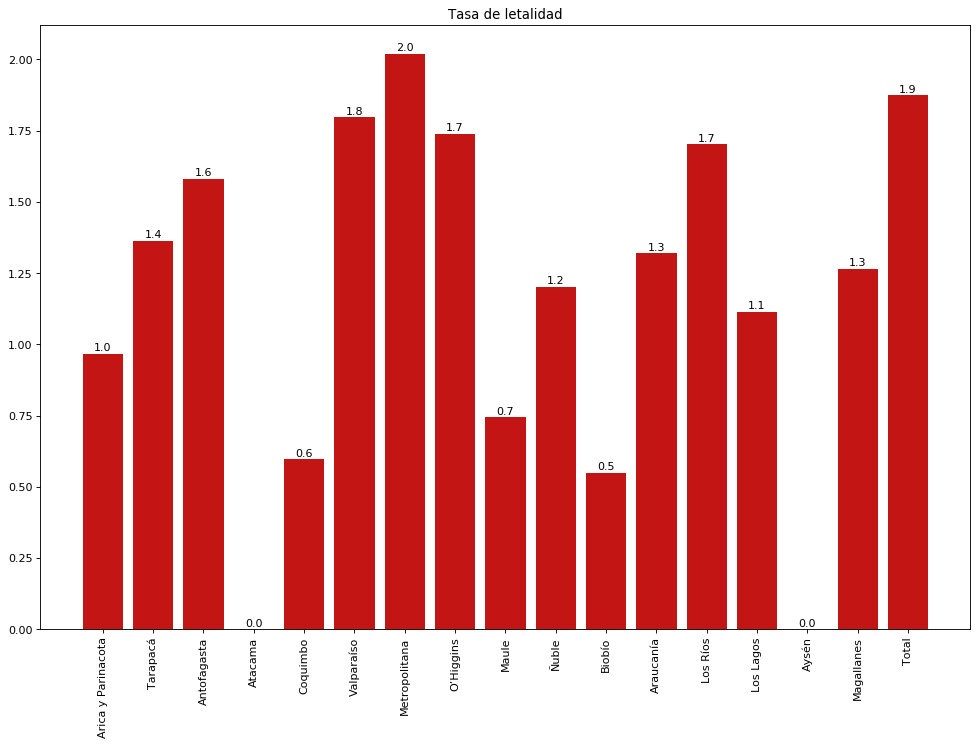

In [13]:
def labelonbars(X, Y):
    n       = len(X)
    aux = 0
    for i in range (n):
        number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
        plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, 1),
                textcoords="offset points",
                ha ='center', va='bottom',
                size='10')    
            
plt.figure(figsize=(15, 10), dpi=80)
plt.bar(X, Y, color='#C41515')
plt.title("Tasa de letalidad")
labelonbars(X, Y)
plt.xticks(X, rotation='vertical')
plt.show()